## Regresión Logística ##



La regresión logística es un método estadístico que modela la probabilidad de ocurrencia de una variable dicotómica (es decir, con dos posibles valores) en función de otras variables independientes. Básicamente se utiliza para crear modelos de clasificación binaria.

Un proceso binomial (o dicotómico) está caracterizado por la probabilidad de éxito, representada por p, la probabilidad de fracaso se representa por q y,  ambas probabilidades están relacionadas por p+q=1. En ocasiones, se usa el cociente p/q, denominado «odds», y que indica cuánto más probable es el éxito que el fracaso, como parámetro característico de la distribución binomial.


Las regresiones logísticas son modelos de regresión que permiten estudiar si una variable binomial depende, o no, de otra u otras variables (no necesariamente binomiales). Por ende, las regresiones logísticas son un caso particular de la regresión lineal pero cuyo dominio de salida está acotado al intervalo \[0,1], en donde el proceso de estimación de los sus parámetros es mediante la máxima verosimilitud. 


A la variable que vamos a modelar se la conoce como variable dependiente o de respuesta y a las variables independientes se las conoce como regresores, predictores o features

En Python existen dos implementaciones muy utilizadas para este tipo de modelo, scikit-learn y statsmodels. Ambas estan muy optimizadas pero cada una tiene una orientación diferente, scikit-learn está mucho más orientada a la predicción y por eso no posee métodos o funciones que nos muestre las características del modelo para poder realizar alguna inferencia del mismo. Statsmodels en este caso es mucho más completa.


$y_i = \beta_0 + \beta_1x1_i+ \beta_2x2_i+\beta_3x3_i+..+\beta_pxp_i+\epsilon_i$ 

$\beta_0$: es la ordenada al origen. Este valor corresponde a la variable respuesta cuando todos los predictores toman el valor 0

$\beta_p$: es el efecto que genera una variable respuesta al incrementar en una unidad la variable predictora ($x_p$), mientras el resto de las variables predictoras se mantienen constantes. Éstas también son conocidas como coeficientes parciales de regresión

$\epsilon$: es el error o residuo. Es la diferencia entre el valor estimado por el modelo y el observado. En esta variable se suman todos los efectos que aparecen de todas aquellas variables que influyen en $y$ pero no se agregan al modelo como los predictores.

Los $\beta$ son todos desconocidos, lo que se hace con el modelo es, en base a una muestra de la población real, establecer unas estimaciones de dichos $\beta$. Estos parámetros serán aquellos que generan un modelo que posee la mayor probabilidad de haber generado los datos observados. Estas estimaciones se realizan mediante un algoritmo denominado de máxima verosimilitud (likelihood)


Cuando la variable a identificar es una variable binaria (codificada como 0 y 1) se puede ajustar un modelo de regresión lineal por mínimos cuadrados. No obstante esto puede traer algunos problemas.  
1) Al generar una recta (o hiperplano) el valor predicho puede ser distinto de 0 y 1.  
2) Si el valor predicho lo queremos utilizar para interpretar como una probabilidad, el valor puede ser menor a 0 y mayor a 1.

Por tal motivo la regresión lineal se transforma en una función cuyo dominio esté entre 0 y 1. Dicha función es la función sigmoide:

$sigmoide = \frac{1}{1+e^{-y}}$

### Odds y logaritmo de Odds

Teniendo un evento cuya probabilidad de éxito es de 0.8, es decir $p=0.8$, la probabilidad de fracaso es de 1 - 0.8 = 0.2, $q=0.2$. Los odds o razón de probabilidad se definen como el ratio de la probabilidad de éxito y la probabilidad de fracaso. En el ejemplo sería
0.8 / 0.2 = 4. Se puede decir que se esperan 4 eventos verdaderos por cada evento falso.

## Interpretación del modelo
### Betas

$\beta_0$: Intercept u ordenada al origen. Es la probabilidad esperada cuando todas la variables independientes poseen el valor 0.

$\beta_p$: Son los coeficientes de regresión parcial de cada variable independiente o también llamada predictor. Nos indican el cambio promedio del logaritmo de odds al incrementar una unidad de la variable predictora o variable independiente, manteniéndose el resto de las variables constantes. Lo mismo es decir que por cada unidad que se incrementa la variable predictora $x_p$, se multiplican los odds por $e^{\beta_p}$

### Significancia del modelo 
#### Likelihood Ratio
Uno de los primeros resultados que debemos evaluar para saber si el modelo de regresión logística, es el test de significancia likelihood ratio (LLR). El test nos indica si el modelo en todo su conjunto es capaz de predecir la variable respuesta mejor que lo haría el azar. Lo que se hace es comparar la probabilidad de obtener los valores observados con el modelo armado ($\beta_p$ ≠ 0) y un modeo sin predictores (todos los $\beta_p$ = 0)

Si el test resulta significativo, nos indica que el modelo es útil, pero no que sea el mejor.

#### Significancia de los predictores
Lo que estamos buscando en un estudio de regresión logística es, mediante una muestra poblacional, encontrar un modelo que explique la relación existente entre las variables para toda la población. Para cada coeficiente de la ecuación de regresión ($\beta_p$) se puede calcular la su significancia (p-value) y su intervalo de confianza. El test estadístico que más se utiliza es el Wald chi-test.

El test de significancia de los coeficientes ($\beta_p$) del modelo logístico considera como hipótesis:
1) $H_0$: El predictor xp no contribuye al modelo ($\beta_p$ = 0 ), en presencia del resto de los predictores
2) $H_a$: El predictor xp si contribuye al modelo ($\beta_p$ ≠ 0 ), en presencia del resto de los predictores

Como se comentó anteriormente, en la librería statsmodel se devuelven los valores Z, los p-values y los intervalos de confianza. Con estos datos podemos darnos cuenta si las estimaciones son significativamente distintos de 0, es decir, si contribuyen al modelo.


### Condiciones para aplicar una regresión logística
Para aplicar este algoritmo y que las conclusiones derivadas de él deben cumplirse ciertos principios matemáticos que en la realidad rara vez se cumplen o no se pueden demostrar. No obstante, no significa que el modelo no sea útil, sólo hay que tenerlo en claro y ser concientes de dichos puntos para entender los impactos en las explicaciones que vayamos a realizar.

#### No colinealidad o multicolinealidad
Los predictores deben ser independientes, o sea, no debe haber colinealidad entre ellos. La colinealidad existe cuando un predictor está linealmente relacionado con uno o varios de los otros predictores del modelo. Como consecuencia de esta colinealidad no se puede identificar de forma concreta el efecto que tiene un predictor con la variable target (o respuesta). Esto genera un incremento en la varianza de los coeficientes de regresión. 
La colinealidad propiamente dicha existe si el coeficiente de correlación es 1, esto muy rara vez pasa, pero si ocurre una casi-colinealidad o multicolinealidad no perfecta.

Existen dos alternativas para solucionar este punto:
1) Una de las variables se elimina, esto no debe tener mucho impacto en el modelo ya que las variables son redundantes y deberían generar el mismo efecto. Se debería mantener aquella variable que más influencia tiene en el modelo (esto queda a juicio del investigador)
2) Realizar una combinación de ambas variables en una única variable. Esto puede generar un efecto negativo que es que se puede perder la interpretación de la variable.

#### Relación lineal entre predictores numéricos y el logaritmo de odds de la variable respuesta
Cada predictor numérico tiene que estar linealmente relacionado con el logaritmo de odds de la variable respuesta  y  mientras los demás predictores se mantienen constantes, de lo contrario no se deben introducir en el modelo.


#### No autocorrelación (Independencia)
Los valores de cada una de las observaciones es independiente de los otros. Esto es facilmente comprobable cuando se trabaja con mediciones temporales. 


#### Valores atípicos, con alto leverage o influyentes
Es importante identificar observaciones que sean atípicas o que puedan estar influenciando al modelo. 

#### Tamaño de la muestra
El tamaño de la muestra no es una condición de por si. No obstante se recomienda que el número de observaciones para la muestra sea como mínimo entre 10 o 20 veces el número de predictores del modelo.


#### Parsimonia
El principio de parsimonia nos indica que el mejor modelo es aquel que explica con mayor precisión las variaciones observadas de la variable respuesta utilizando la menor cantidad de predictores.


## Métricas ##
Un punto sumamente importante a la hora de construir un modelo es saber cómo lo vamos a medir. Muchas veces nos preocupamos por la información que vamos a utilizar, la cantidad de variables que vamos a crear, qué algoritmos vamos a utilizar y no prestamos demasiada atención en las métricas que vamos a usar a la hora de evaluar lo que estamos haciendo. Las métricas a utilizar las podemos dividir en dos grandes grupos, métricas propias de la creación de un modelo que nos indicarán que tan efectivo es el mismo y métricas del negocio que nos dirán si la solución propuesta responde al problema planteado por el negocio. Anteriormente comentaba que debemos conocer nuestro problema y nuestros datos para poder definir la métrica, y esto se debe a que podemos tener muchos factores que harán que tomemos decisiones con respecto a cómo medir nuestro trabajo. Un caso de esto es la posibilidad de tener bases muy "desbalanceadas" (cuando una base está desbalanceada, tenemos muchos casos de una clase y pocos de las restantes, un ejemplo de este punto son los modelos de attrition, en las que las bajas por mes son mucho menores que las personas que siguen siendo clientes)  

![join.JPG](https://www.aprendemachinelearning.com/wp-content/uploads/2019/05/confusion_matix_example.png)


**_Matriz de Confusión_**: Es una herramienta que nos permite observar el desempeño un algoritmo que se utiliza en aprendizaje supervisado. Las columnas de la matriz representa el número de predicciones de cada clase, y cada fila representa las observaciones reales de cada una de las clases. Una de las ventajas de las matrices de confusión es que nos facilitan ver si el sistema está confundiendo dos clases.  

**_Accuracy - Efectividad_**: La efectividad nos indica a cuantas observaciones le acerté a la hora de predecir su target. En otras palabras es el porcentaje de predicciones correctas sobre el total de observaciones. Como dijimos anteriormente, esta métrica funciona correctamente solamente si las clases están balanceadas, es decir, tienen la misma cantidad de sucesos todos los valores.
$$Accuracy = \frac{truePositive+trueNegative}{totalSamples}$$

**_precisión_**: Es el número de casos positivos correctamente predichos dividido la suma de todos los positivos predichos por el modelo. Nos dirá cúan confiable es un modelo en responder si una observación es de una clase determinada
$$precision = \frac{truePositives}{truePositives+falsePositives}$$

**_recall_**: Es el número de casos positivos correctamente predichos sobre el total de casos reales positivos (esto incluye los verdaderos positivos y falsos negativos). El recall nos dirá cúan bien puede el modelo detectar a una clase.
$$recall = \frac{truePositives}{truePositives+falseNegatives}$$

1) Si tenemos alta precisión y alto recall: podemos indicar que el modelo puede manejar perfectamente a esa clase.
2) Si tenemos alta precisión y bajo recall: el modelo no puede detectar muy bien la clase, pero si lo hace es totalmente confiable.
3) Si tenemos baja precisión y alto recall: el modelo detecta bien la clase


**_Curva ROC_**: La curva ROC (receiver operating characteristic curve) es un gráfico que nos ayuda a visualizar la performance de un modelo de clasificación en todos los umbrales de clasificación. Esta curva se dibuja gracias a dos parámetros:
* True Positive Rate (TPR): Es un sinónimo de recall y se define de la siguente forma: 
$$\frac {truePositives}{truePositives + falsePositives} $$
* False Positive Rates (FPR):
$$\frac{falsePositives}{falsePositives + trueNegatives} $$

La curva ROC grafica TPR vs. FPR para los diferentes puntos que podemos tomar como umbrales. Si bajamos el umbral, más items clasificaremos como positivos.


![join.JPG](https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg?hl=es-419
)
Para poder computar los puntos de la curva ROC, una forma es correr un modelo (por ejemplo una regresión logística, n veces, todas con un umbral diferente. No obstante, no es una forma eficiente de hacerlo. Para que podamos correr de forma eficiente esta métrica se utiliza un algoritmo que nos permite generar esta información, es el AUC.


**_AUC_**: Área debajo de la curva ROC (Area Under the ROC Curve), mide el área de completa de la curva. Desde (0,0) a (1,1). Integral de la curva


![join.JPG](https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg?hl=es-419)



## Regresión logística en Python

### Importo y configuro lo necesario

In [1]:
import pandas as pd
import numpy as np
#Este seteo de pandas sirve para que se puedan visualizar todas las columnas
#del dataframe#############################
pd.set_option('display.max_columns', None)#
pd.set_option('display.float_format', lambda x: '%.9f' % x)

###########################################

#Esta librería sirve para que oculte todo tipo de warnings que puedan 
#aparecer en el código. Generalmente si una función está por ser data de 
#baja o modificada en una librería, varias versiones antes aparecen estos
#tipos de advertencias cuando se ejecuta el código
import warnings###################
warnings.filterwarnings("ignore")#
##################################

#La función train_test_split sirve para dividir la base en dos partes
#Train y test para poder entrenar y validar un modelo#
from sklearn.model_selection import train_test_split##
######################################################

from scipy.stats import norm
#La función LigsticRegression es el modelo propiamente dicho
from sklearn.linear_model import LogisticRegression#########
############################################################

#Definimos las métricas
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
from google.colab import drive
import os

### Monto la carpeta de Drive

In [2]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Mounted at /content/drive


### Levanto la base 

In [3]:
data = pd.read_csv("{}/casosCovidProcesada.txt".format(contentFolder), sep=";")

In [4]:
data.head()

,id_evento_caso,ratioEdadGenero,ratioEdadProvincia,extranjero,confirmado,descartado,otros,conSintomas,ratioDescartadoConfirmadoProvincia,sexo_F,sexo_M,sexo_NR,decileEdad,financiamiento_Privado,financiamiento_Público,fallecido
0,1000000,1.459459459,1.384615385,0,0,1,0,0,1.333764126,0,1,0,7,1,0,0
1,1000002,0.594594595,0.594594595,0,0,1,0,0,1.333764126,0,1,0,1,0,1,0
2,1000006,0.783783784,0.783783784,0,0,0,1,1,1.333764126,0,1,0,2,0,1,0
3,1000009,1.972972973,1.972972973,0,0,1,0,1,1.333764126,0,1,0,9,1,0,0
4,1000021,0.675675676,0.675675676,0,0,1,0,1,1.333764126,0,1,0,1,0,1,0


## Regresión logística en Scikit Learn

### Documentación de Scikit Learn

*La* documentación de la implementación de la regresión logística de Sklearn se encuentra [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

### Divido la base
Divido la base en dos partes, una parte para entrenar el modelo (la llamaré train) y otra parte con la que testearé el modelo (la llamaré test)  
Utilizo una función de la librería scikit que se denomina train_test_split() y la documentación la pueden entrondar [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [52]:
X = data.drop(columns = ["id_evento_caso", "fallecido"])
y = data.fallecido
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
print("Registros de la base de entrenamiento: {}, que es el {} de la base total".format(len(X_train), len(X_train)/len(X)))
print("Registros de la base de testeo: {}, que es el {} de la base total".format(len(X_test), len(X_test)/len(X)))

Registros de la base de entrenamiento: 5413117, que es el 0.6699999257359567 de la base total
Registros de la base de testeo: 2666163, que es el 0.3300000742640433 de la base total


### Entreno el modelo

In [7]:
#Instancio el modelo de regresión logística y utilizo el método fit para entrenar el modelo
sckModel = LogisticRegression().fit(X_train, y_train)

### Obtengo las probabilidades
Con el modelo entrenado, obtengo las probabilidades de éxito (aquello que marqué cómo 1) de la base de test. Para ello uso la función predict_proba() del modelo creado

In [15]:
#Con esta linea obtengo una matriz en donde cada registro posee dos valores, la probabilidad de que sea el target 0 y 
#la probabilidad de que el target sea 1, la suma de ambas probabilidades siempre dará 100% (o el valor 1)
p = sckModel.predict_proba(X_test)

#De esta forma sólo nos quedamos con la probabilidad de éxito del modelo, o dicho de otra forma, de que el target de 1
sckProbs = p[:,-1]

In [ ]:
# coef_ nos da los betas de las variables
sckModel.coef_[0]

array([ 1.12599646,  1.99322545,  0.00589771, -0.57123261, -2.82999103,
       -2.52937195,  2.05962921, -0.04465571, -2.21289366, -1.7266034 ,
       -1.99109853,  0.22301854, -2.80882394, -3.12177165])

In [ ]:
#Con feature_names_in_ puedo ver los nombres de las variables que accedieron al modelo
sckModel.feature_names_in_

array(['ratioEdadGenero', 'ratioEdadProvincia', 'extranjero',
       'confirmado', 'descartado', 'otros', 'conSintomas',
       'ratioDescartadoConfirmadoProvincia', 'sexo_F', 'sexo_M',
       'sexo_NR', 'decileEdad', 'financiamiento_Privado',
       'financiamiento_Público'], dtype=object)

In [ ]:
# Para obtener el sesgo o el intercepto se usa intersept_
sckModel.intercept_

array([-5.93059559])

## Regresión logística en statsmodels

In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
statsModel=logit_model.fit()
print(statsModel.summary2())

Optimization terminated successfully.
         Current function value: 0.029944
         Iterations 12
                                        Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.425      
Dependent Variable:           fallecido                 AIC:                       324209.6501
Date:                         2022-08-17 00:06          BIC:                       324371.7022
No. Observations:             5413117                   Log-Likelihood:            -1.6209e+05
Df Model:                     11                        LL-Null:                   -2.8206e+05
Df Residuals:                 5413105                   LLR p-value:               0.0000     
Converged:                    1.0000                    Scale:                     1.0000     
No. Iterations:               12.0000                                                         
----------------------------------------------------------------------------------

In [55]:
#Calculo las probabilidades del modelo de statsmodels
statsProbs = statsModel.predict(X_test).values

## Métricas en Python

### Cálculo el accuracy del modelo [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [18]:
#El accuracy del modelo es:
accuracy_score(y_test, sckProbs > 0.5)

0.9910151779917432

#### Ejercicio 1
En este caso, donde menos del 1% de los casos es target 1 (fallecidos), ¿está métrica es válida?

_Inserte aquí su respuesta_




### Cálculo de la matriz de confusión [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [26]:
confusion_matrix(y_test, sckProbs > 0.5)

array([[2640426,    1348],
       [  22607,    1782]])

#### Ejercicio 2
Si modificamos el umbral, y lo ubicamos las cerca del 0 (por ejemplo en 0.1), ¿Qué pasará?

_Inserte aquí su respuesta_

### Cálculo del recall [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [22]:
recall_score(y_test, sckProbs > 0.5)

0.07306572635204396

### Cálculo de la precisión [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

In [23]:
precision_score(y_test, sckProbs > 0.5)

0.5693290734824281

### Construcción de la curva ROC

AUC [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)  
ROC [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

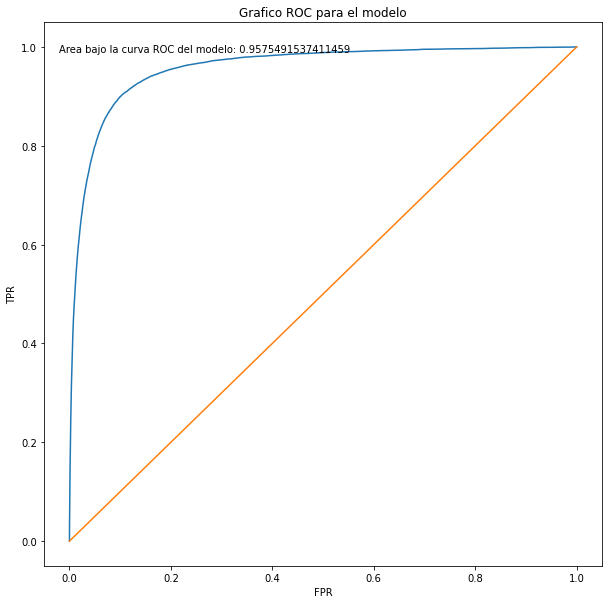

In [24]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
areaBajoCurvaRoc = roc_auc_score(y_test, sckProbs)
fpr, tpr, _ = roc_curve(y_test, sckProbs)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

## Una forma para calcular mejores puntos de corte

La idea es poder encontrar un punto de corte que nos mejore las predicciones y así poder implementar los modelos.  
Realizo dos divisiones:
* La primera divido las probabilidades en 10 grupos (previo normalizo la probabilidad y la multiplico por 1000)  
* La segunda división será por deciles en base a las probabilidades obtenidas en el modelo

In [49]:
X_test["probabilities"] =  sckProbs
#Normalizo el score
X_test["normalizedScore"] = X_test.probabilities * 1000
#Armo los buckets cada 100 puntos
X_test["bucket"] = pd.cut(X_test.normalizedScore, np.array([0,100,200,300,400,500,600,700,800,900,1000]))
#Armo los deciles por scores
X_test['decile'] = pd.qcut(X_test.probabilities, 10, labels=False)

In [ ]:
#Armo un dataframe con los valores mínimos y máximos por cada uno de los deciles. Así después se podrá calcular 
#si los modelos se degradan o no
#deciles = X_test.groupby("decile").agg({"scoreNormalizado":["min", "max"]}).reset_index()
#deciles.columns = ["decile", "minimo", "maximo"]
#values = np.append(np.array(0), deciles.maximo.values)
#X_test['originalDecile'] = pd.cut(X_test.scoreNormalizado, values)

Comienzo a realizar los cálculos.
* Primero se realizar una sumarización de la variable que utilizamos como target (en nuestro caso se denomina _fallecido_. (casos positivos y total de casos
* Segundo calculamos los % de fallecidos y no Fallecidos.
* Ordenamos el dataset por deciles y realizamos la acumulación de los porcentajes 

In [50]:
X_test["fallecido"] = y_test

measures = X_test.groupby("decile").agg({"fallecido": ["sum", "count"]})
measures.columns = ["fallecidos", "Casos"]
measures["noFallecidos"] = measures["Casos"]-measures["fallecidos"]
measures["% no Fallecidos"] = (measures["noFallecidos"] / len(X_test[X_test.fallecido == 0])).round(2)
measures["% Fallecidos"] = (measures["fallecidos"] / len(X_test[X_test.fallecido == 1])).round(2)
measures = measures.sort_index(ascending = False)
a = measures[["% no Fallecidos", "% Fallecidos"]]\
                .cumsum()\
                .rename(columns={"% no Fallecidos": "% no Fallecidos acum.", 
                                 "% Fallecidos": "% Fallecidos acum."})

measures = measures.join(a)
measures

,fallecidos,Casos,noFallecidos,% no Fallecidos,% Fallecidos,% no Fallecidos acum.,% Fallecidos acum.
decile,,,,,,,
9,21694,265556,243862,0.090000000,0.890000000,0.090000000,0.890000000
8,1535,267161,265626,0.100000000,0.060000000,0.190000000,0.950000000
7,509,267110,266601,0.100000000,0.020000000,0.290000000,0.970000000
6,225,266527,266302,0.100000000,0.010000000,0.390000000,0.980000000
5,140,265720,265580,0.100000000,0.010000000,0.490000000,0.990000000
4,91,267321,267230,0.100000000,0.000000000,0.590000000,0.990000000
3,76,266880,266804,0.100000000,0.000000000,0.690000000,0.990000000
2,35,266451,266416,0.100000000,0.000000000,0.790000000,0.990000000
1,46,265404,265358,0.100000000,0.000000000,0.890000000,0.990000000


Esta tabla y muchos más análisis se pueden realizar con la librería denominada KDS. [Documentación](https://pypi.org/project/kds/)

### Ejercicio 3
Revisando el cuadro anterior. ¿Qué corte nos conviene elegir?

_Inserte aquí su respuesta_

### Ejercicio 4
Realizar el mismo ejercicio pero con los buckets armados de probabilidades

In [ ]:
#Inserte su código aquí

###

### Ejercicio 5
Calculartodas las métricas con el modelo armado con la librería statsmodels

### Ejercicio 6
¿Hay diferencias en las métricas?